In [51]:
import numpy as np
import cv2
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib import pyplot as plt
import math
import PDI.histograma.histo as histo
import PDI.utils.utils as utils
import PDI.filtros.espacial as espacial
import PDI.filtros.frecuencia as frecuencia

In [2]:
#def main(img):
    
    

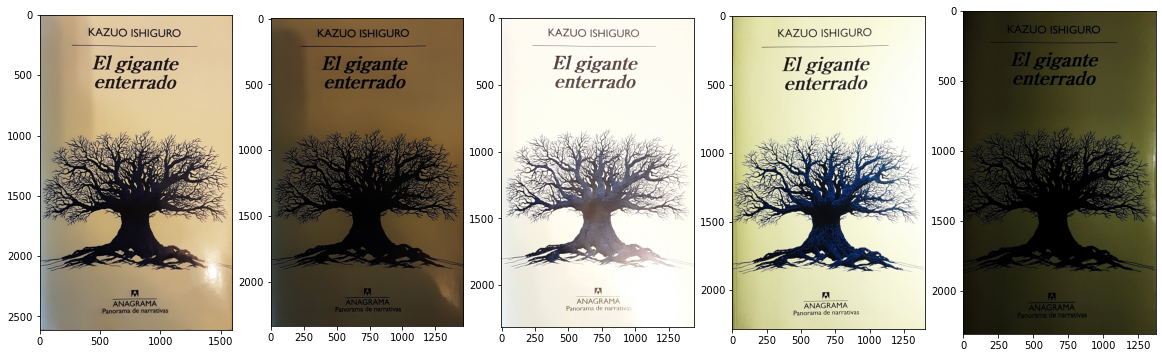

In [3]:
GD1 = cv2.imread("./Imagenes/libro1.jpg")
GD1 = cv2.cvtColor(GD1, cv2.COLOR_BGR2RGB)
GD2 = cv2.imread("./Imagenes/libro2.jpg")
GD2 = cv2.cvtColor(GD2, cv2.COLOR_BGR2RGB)
GD3 = cv2.imread("./Imagenes/libro3.jpg")
GD3 = cv2.cvtColor(GD3, cv2.COLOR_BGR2RGB)
GD4 = cv2.imread("./Imagenes/libro4.jpg")
GD4 = cv2.cvtColor(GD4, cv2.COLOR_BGR2RGB)
GD5 = cv2.imread("./Imagenes/libro5.jpg")
GD5 = cv2.cvtColor(GD5, cv2.COLOR_BGR2RGB)
GD = [GD1,GD2,GD3,GD4,GD5]

utils.plot(GD, figsize=(20,10), patron=(1,5))

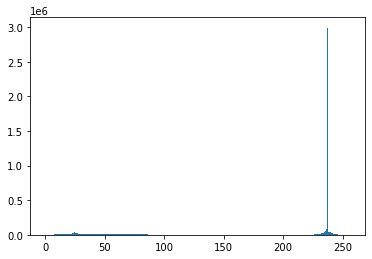

In [4]:
imgOriginal = cv2.imread("./Imagenes/giganteORIGINAL.jpeg")
imgOriginal = cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2RGB)
imgOriginalGray = cv2.cvtColor(imgOriginal,cv2.COLOR_RGB2GRAY)
#plt.imshow(imgOriginalGray, cmap='gray');
plt.hist(imgOriginalGray.ravel(),256,[0,256]);

In [5]:
#Analisis de histograma
def compararHisto(compararHisto_original, compararHisto_muestra, canal='Gris'):

    print("___________________________________________________________________________________________________________________")
    print("___________________________________________________________________________________________________________________")
    print("Comparación en el canal: ",canal)
    plt.figure(figsize=(18,7))
    plt.subplot(221)
    plt.title("ORIGINAL")
    plt.imshow(compararHisto_original, cmap='gray')
    plt.subplot(222)
    plt.title("MUESTRA")
    plt.imshow(compararHisto_muestra, cmap='gray')
    plt.show()
    plt.figure(figsize=(15,5))
    plt.title("ORIGINAL: AZUL | MUESTRA: NARANJA")
    plt.hist(compararHisto_original.ravel(),256,[0,256]);
    plt.hist(compararHisto_muestra.ravel(),256,[0,256]);
    plt.show()

In [6]:
def comparar_gris_y_rgb(original, img): #pasarlas como rgb
    #cargamos imagenes
    dim = (img.shape[1],img.shape[0])
    original_resize = cv2.resize(imgOriginal, dim,interpolation = cv2.INTER_AREA) #hacemos resize para ser consistente con las comparaciones

    print(original_resize.shape, "asd", img.shape)
    #comparamos histogramas en gris
    imgGray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    imgOriginalGray = cv2.cvtColor(original,cv2.COLOR_RGB2GRAY)

    compararHisto(imgOriginalGray,imgGray)

    img_rgb_canales = cv2.split(img)
    img_orginal_rgb_canales = cv2.split(original)

    #comparamos histogramas en rojo
    compararHisto(img_orginal_rgb_canales[0],img_rgb_canales[0],"Rojo")

    #comparamos histogramas en verde
    compararHisto(img_orginal_rgb_canales[1],img_rgb_canales[1],"Verde")

    #comparamos histogramas en azul
    compararHisto(img_orginal_rgb_canales[2],img_rgb_canales[2],"Azul")

In [71]:
def eqHist(img, plot=1):
    """
    Dibuja la imagen original y las ecualizaciones de la misma en los espacios.\n
    La imagen debe estar en RGB.
    Retorna un array con las ecualizaciones
    """
    
    if plot==1:
        plt.figure(figsize=(20,15))
        plt.subplot(1,4,1)
        plt.title('ORIGINAL')
        plt.imshow(img)
    
    #RGB
    channels_rgb = cv2.split(img)
    r_eq = cv2.equalizeHist(channels_rgb[0]) 
    g_eq = cv2.equalizeHist(channels_rgb[1]) 
    b_eq = cv2.equalizeHist(channels_rgb[2])
    rgb_eq = cv2.merge((r_eq, g_eq, b_eq)) 

    #HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    channels_hsv = cv2.split(img_hsv)
    v_eq = cv2.equalizeHist(channels_hsv[2])
    hsv_eq = cv2.merge((channels_hsv[0], channels_hsv[1], v_eq)) 
    hsv_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

    #HSI
    '''
    channels_hsi = RGB2HSI(img)
    i_eq = cv2.equalizeHist(channels_hsi[2])
    hsi_eq = cv2.merge((channels_hsi[0], channels_hsi[1], i_eq)) 
    hsi_channels_rgb = HSI2RGB(hsi_eq)
    hsi_eq = cv2.merge((hsi_channels_rgb[0], hsi_channels_rgb[1], hsi_channels_rgb[2]))
    '''

    if plot==1:
        plt.subplot(1,4,2)
        plt.title("RGB")
        plt.imshow(rgb_eq, cmap='gray')

        plt.subplot(1,4,3)
        plt.title("HSV")
        plt.imshow(hsv_eq, cmap='gray')

        '''plt.subplot(1,4,4)
        plt.title("HSI")
        plt.imshow(hsi_eq, cmap='gray')'''
    
    return [rgb_eq, hsv_eq]

In [68]:
def RGB2HSI(img):
    r,g,b = cv2.split(img)
    I=((r+g+b)/3).astype('uint8')
    img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV) 
    hsi = cv2.split(img) #asdsd
    hsi[2]=I
    return hsi
 
def HSI2RGB(hsi):  #no funciona bien
    H=hsi[0]
    S=hsi[1]
    I=hsi[2]
    
    r=I*0
    n,k = H.shape
    i=j=0
    for i in range(0,n):
        for j in range(0,k):
            h=math.radians(float(H[i,j]))
            r[i,j]= (1/3) * (1 +((S[i,j] * math.cos(h))/(math.cos(60-h))))
  
    R=(3*I*r).astype(np.uint8)
    b=((1-S)/3)
    B=(3*I*b).astype(np.uint8)    
    g=(1-b-r)
    G=(3*I*g).astype(np.uint8)
    return R,G,B

[[ 35 207 241 ... 157 147 127]
 [ 35  89  55 ... 161 154 139]
 [ 12 241  89 ... 157 152 149]
 ...
 [116 116 159 ... 120  91  77]
 [159 139 185 ...  97 104  83]
 [159 193 220 ... 111  99 104]]


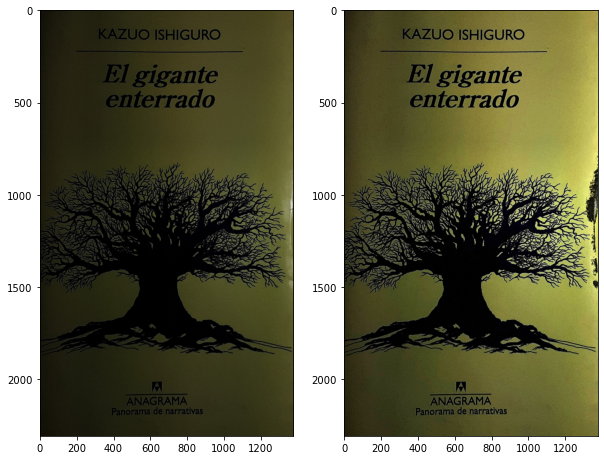

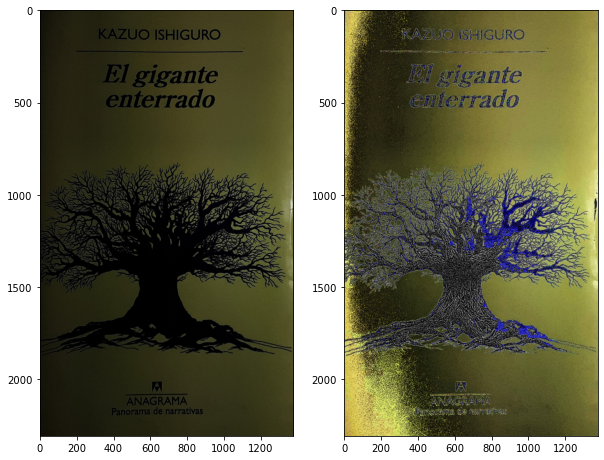

In [69]:
#cargamos imagenes
imgAnalisis = GD5
imgOriginal = cv2.imread("./Imagenes/giganteORIGINAL.jpeg")
imgOriginal_rgb = cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2RGB)
#comparar_gris_y_rgb(imgOriginal, imgAnalisis)

#operacion puntual
#si la imagen tiene alto rango dinamico -> transformacion logaritmica
#sino transformacion de potencia

imgAnalisis_h,imgAnalisis_s,imgAnalisis_v = cv2.split(cv2.cvtColor(imgAnalisis, cv2.COLOR_RGB2HSV))
#Potencia ----------------------------------- en HSV
lut_potencia = utils.t_pot(1,2)
imgAnalisis_pot_v = lut_potencia[imgAnalisis_v].astype(np.uint8)
imgAnalisis_pot_hsv = cv2.merge((imgAnalisis_h,imgAnalisis_s,imgAnalisis_pot_v))
imgAnalisis_pot_rgb = cv2.cvtColor(imgAnalisis_pot_hsv, cv2.COLOR_HSV2RGB)
utils.plot([imgAnalisis, imgAnalisis_pot_rgb],(10,10),(1,2))
#----------------------------------------------------

#Logaritmica ----------------------------------- en HSV
lut_logaritmica = utils.t_log(150)
imgAnalisis_log_v = lut_logaritmica[imgAnalisis_v].astype(np.uint8)

imgAnalisis_log_hsv = cv2.merge((imgAnalisis_h,imgAnalisis_s,imgAnalisis_log_v))
imgAnalisis_log_rgb = cv2.cvtColor(imgAnalisis_log_hsv, cv2.COLOR_HSV2RGB)
utils.plot([imgAnalisis, imgAnalisis_log_rgb],(10,10),(1,2))
print(imgAnalisis_log_v)
#----------------------------------------------------

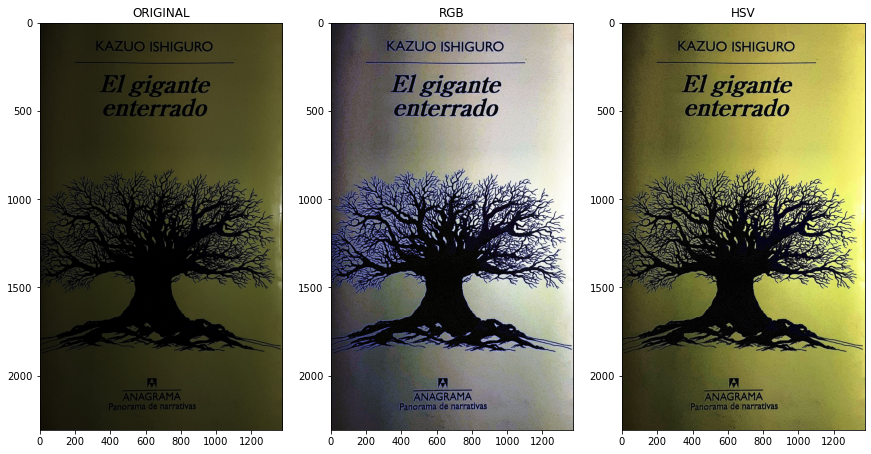

In [72]:
#Ecualizaciones de histogramas
ecualizaciones = eqHist(imgAnalisis,1)

